## Task 3
### Exploratory Data Analysis on Retail store data
#### Author: Abin Johnson
#### Submitted to: The Sparks Foundation

#### Importing Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import warnings 
warnings.filterwarnings('ignore')

#### Importing the dataset

In [5]:
ds=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\SampleSuperstore.csv")
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
ds.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
ds.shape

(9994, 13)

In [8]:
ds.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
ds.duplicated().sum() 

17

##### No. of unique values for each column in the dataset.

In [11]:
ds.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##### dropping the duplicate values from the datasets

In [12]:
ds['Postal Code'] = ds['Postal Code'].astype('object')
ds.drop_duplicates(subset=None,keep='first',inplace=True)
ds.duplicated().sum()

0

##### to check the correlation using a heat map

<AxesSubplot:>

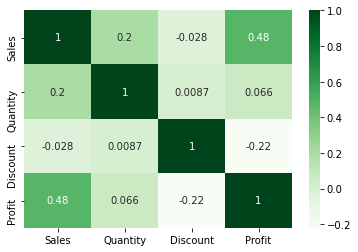

In [13]:
corr = ds.corr()
sns.heatmap(corr,annot=True,cmap='Greens')

In [ ]:
##### we can see that significant Multicollinearity is not present.

#### Analyzing the Dataset

In [14]:
ds = ds.drop(['Postal Code'],axis = 1)   

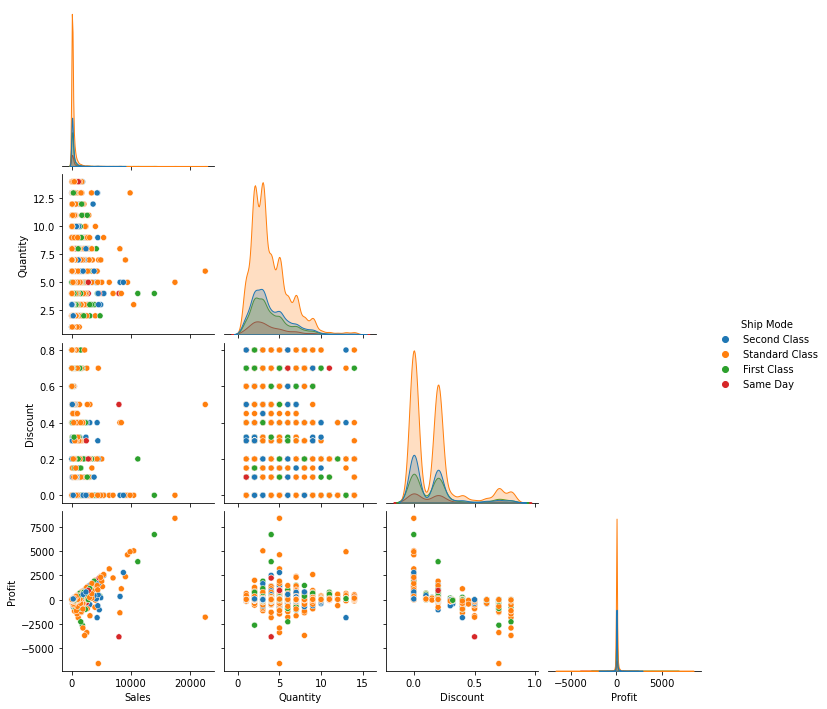

In [15]:
sns.pairplot(ds, hue = 'Ship Mode', corner = True)

In [16]:
ds['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

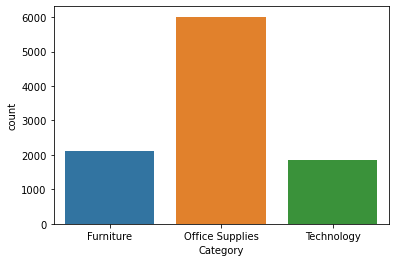

In [17]:
sns.countplot(ds['Category'])

##### as you can see above, Office supplies are having the greatest counts than furniture and technology

In [18]:
ds['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

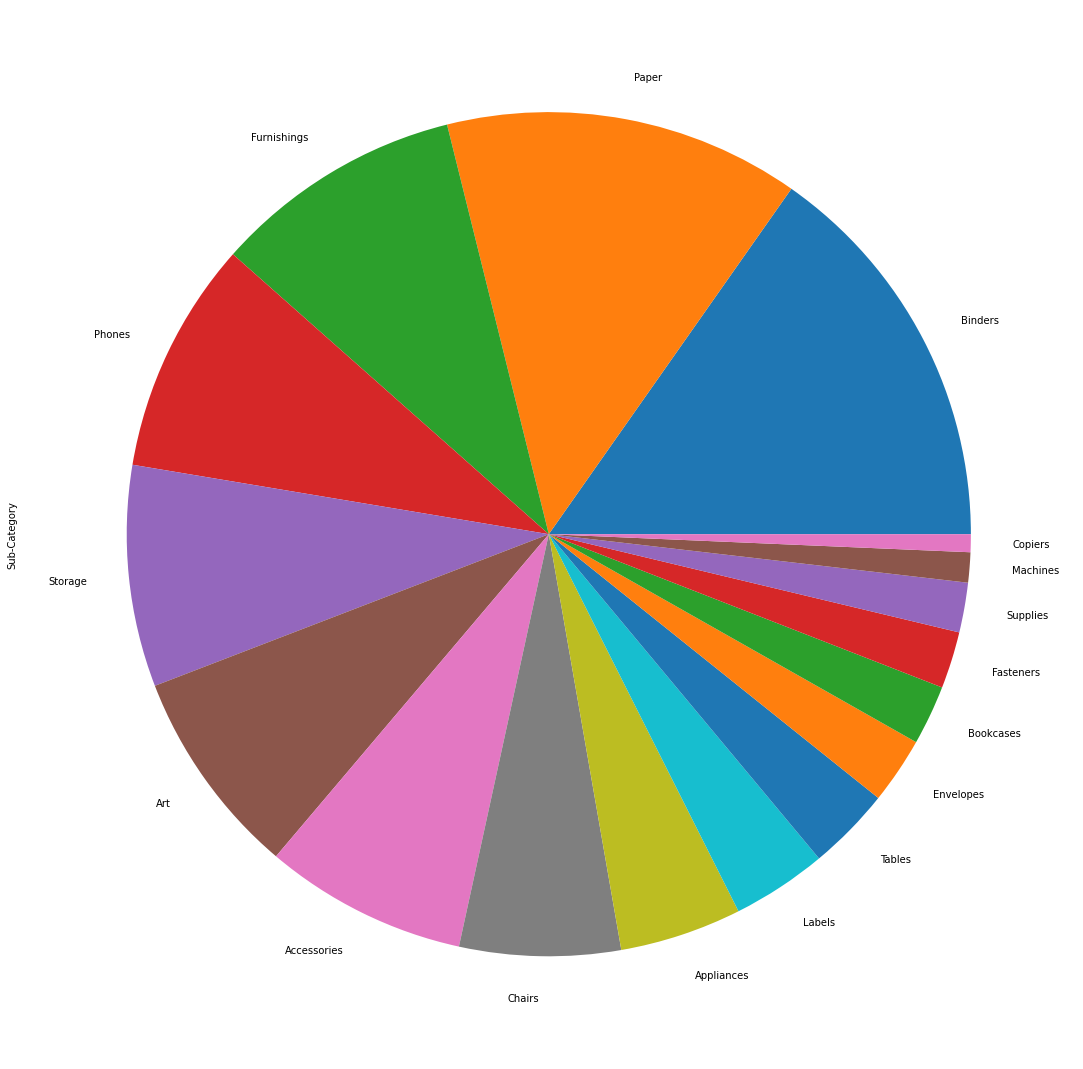

In [75]:
plt.figure(figsize=(15,15))
ds['Sub-Category'].value_counts().plot.pie()
plt.tight_layout()
plt.show()

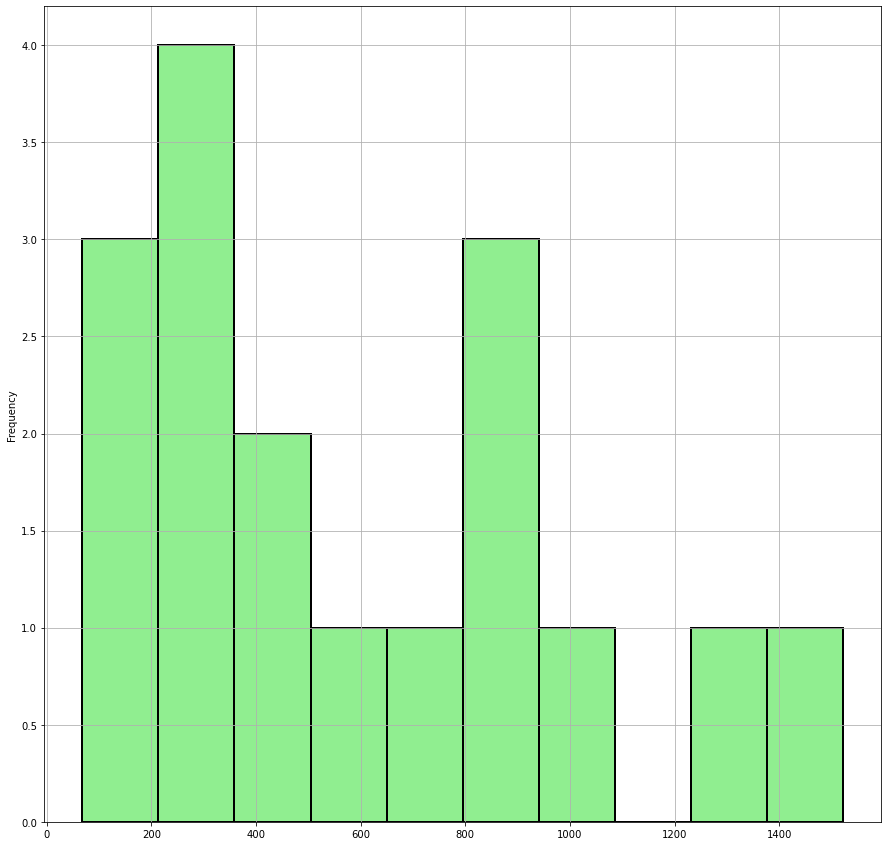

In [79]:
plt.figure(figsize=(15,15) )
ds['Sub-Category'].value_counts().plot.hist(color="lightgreen",edgecolor="black",lw=2)
x_label = "Frequency"
plt.grid()
plt.show()

##### According to both Pie charts and Histograms, Binders has the highest count, followed by papers and Furnishings.

##### Let's check for the preferred mode of delivery

In [21]:
ds['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

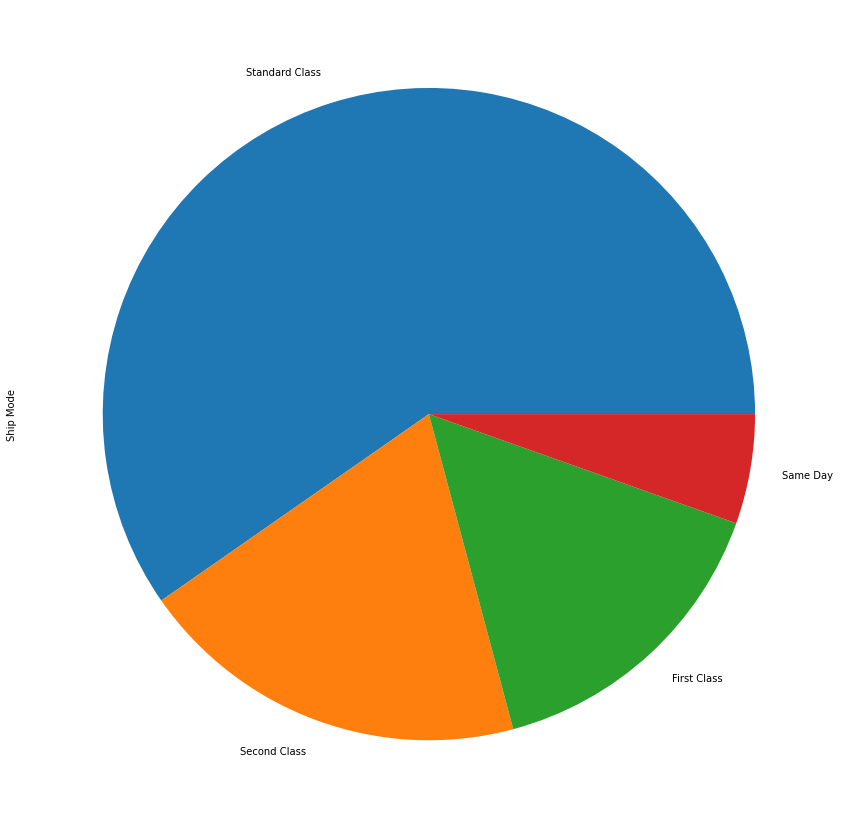

In [22]:
plt.figure(figsize=(15,15))
ds['Ship Mode'].value_counts().plot.pie()
plt.show()

##### more than 50% count is designated to Standard class, then comes the second class in the preferred mode of delivery.

In [23]:
ds['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [24]:
ds['City'].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Jupiter            1
Norfolk            1
San Mateo          1
Conroe             1
Ormond Beach       1
Name: City, Length: 531, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

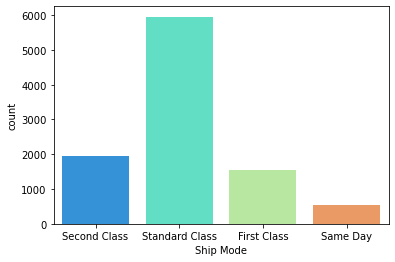

In [25]:
sns.countplot(ds['Ship Mode'],palette = 'rainbow')

<AxesSubplot:xlabel='Segment', ylabel='count'>

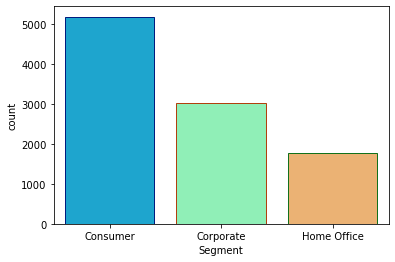

In [26]:
sns.countplot(ds['Segment'],palette = 'rainbow',edgecolor=sns.color_palette("dark", 3))

<Figure size 72x72 with 0 Axes>

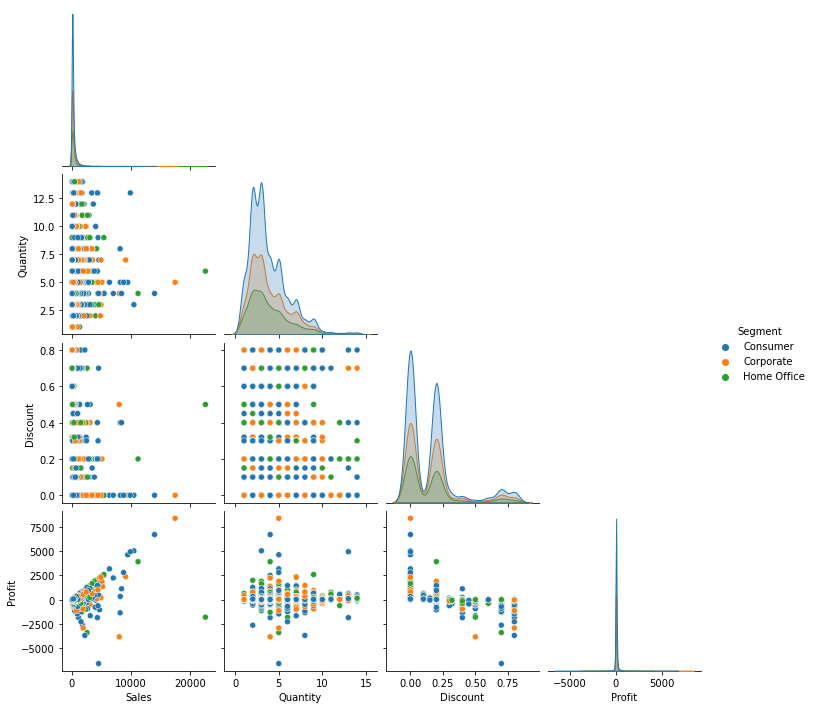

In [27]:
plt.figure(figsize=(1,1))
sns.pairplot(ds,hue='Segment',corner = True)
plt.show()

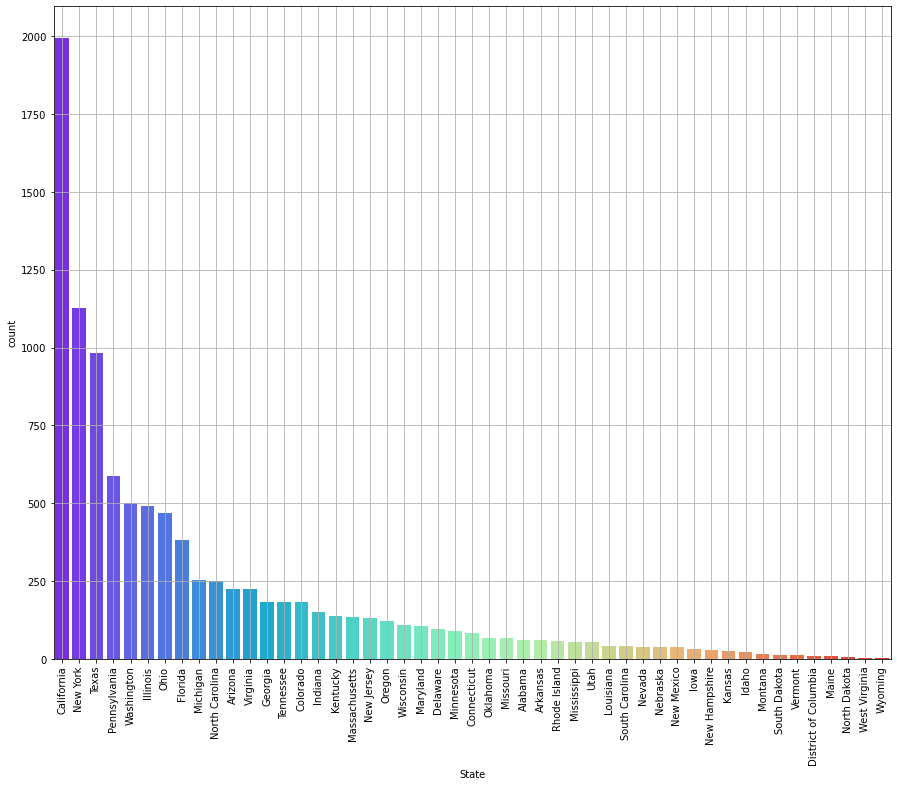

In [61]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=ds,palette='rainbow',order=ds['State'].value_counts().index)
plt.xticks(rotation=90)
plt.grid()
plt.show()

##### These visualization are representing the number of buyers from different states. California has the highest number of buyers, followed by New York and Texas.

In [28]:
ds['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

##### Above, no. of buyers are arranged in descending form, starting from the most no. of buyers(California) to least no. of buyers(Wyoming)

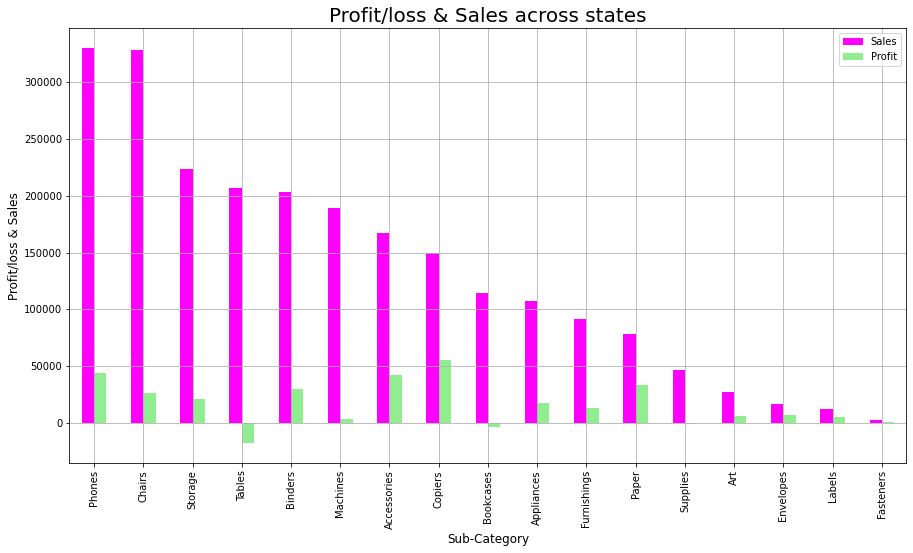

In [55]:
ps = ds.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['magenta','lightgreen'],figsize=(15,8))
plt.title('Profit/loss & Sales across states', fontsize=20)
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Profit/loss & Sales',fontsize=12)
plt.grid()
plt.show()

##### Phones sub-category have high sales.
##### chairs have high sales but less profit compared to phones
##### Tables and Bookmarks sub-categories facing huge loss

##### Lets see how much quantity, customers buys

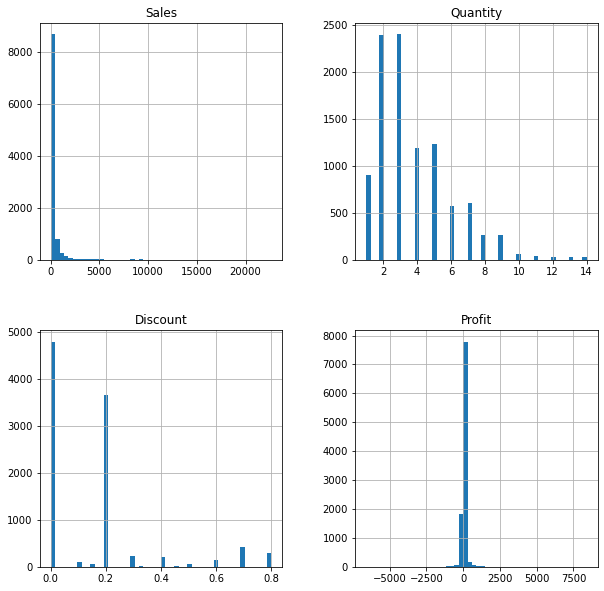

In [29]:
ds.hist(figsize=(10,10),bins=50)
plt.show()

##### Most customers tends to buy quantity of 2 and 3.Discount give maximum is 0 to 20 percent

##### Being a Business manager, I would like to know if the discounts provided by our Superstore is giving us the profit or not  

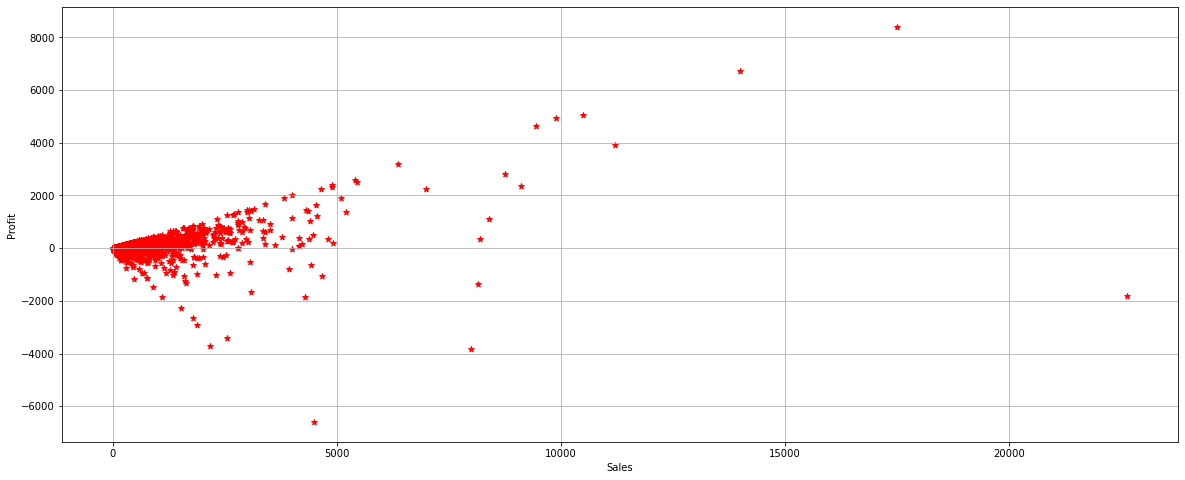

In [56]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(ds['Sales'],ds['Profit'],marker= '*', color = "Red")
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.grid()
plt.show()

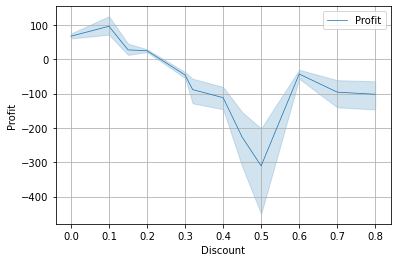

In [57]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=ds,dashes=True,markers=True,lw=0.75)
plt.legend()
plt.grid()
plt.show()

##### According to the above plot, there is no correlation between Profit and Discount, that is even if discounts increase, it 

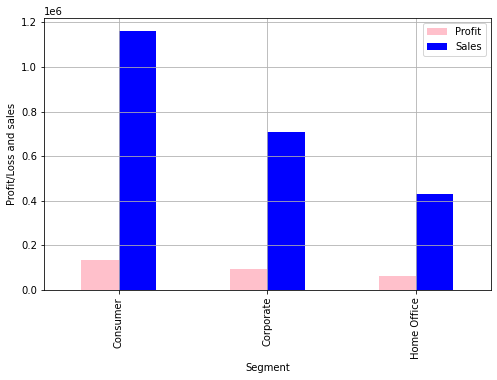

In [58]:
ds.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.grid()
plt.show()

##### Profit and sales are maximum in consumer segment and minimum in Home Office segment, so Home office segment should be taken care of, in order to gain more total profit.

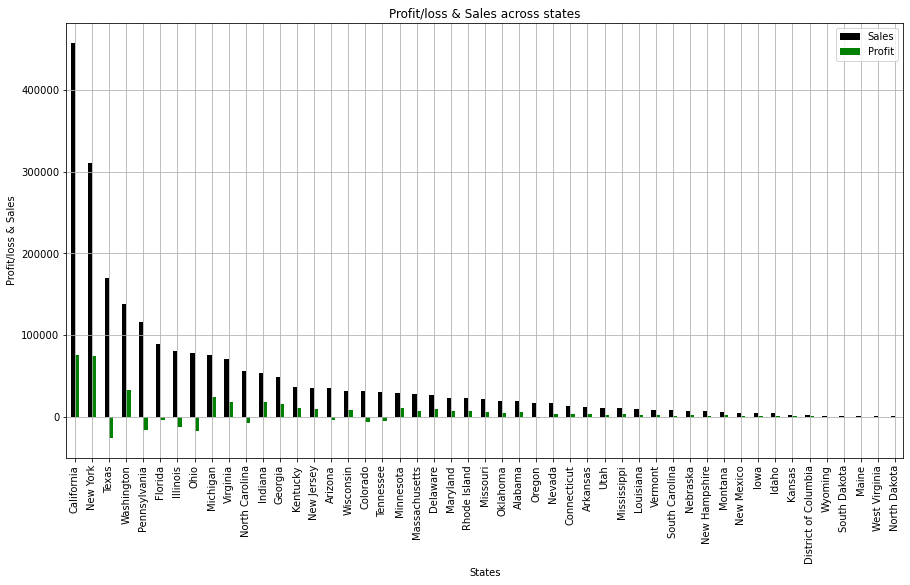

In [59]:
ps = ds.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['Black','Green'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.grid()
plt.show()

##### Highest sales and profits are from California. North Dakota, west virginnia and Maine are the states with lowest Profitand Sales.
##### Texas, Pennsylvania, Florida are suffering Loss.

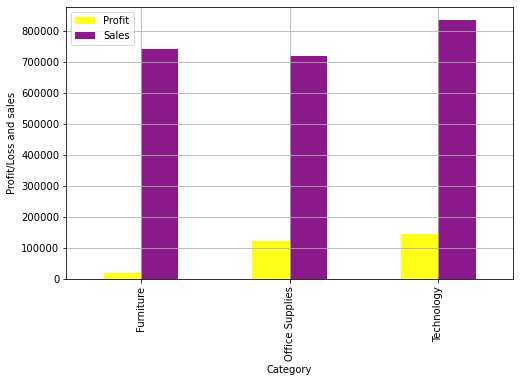

In [60]:
ds.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.grid()
plt.show()

##### As a business manager, from above I can see that Technology and Office Supplies has a high profit, whereas Furnitures has a low profit